# Regresión Lineal: Predicción de Precios de Autos

Una tarea bastante común en el contexto de Machine Learning es la predicción de una variable según algunos descriptores. En esta ocasión partiremos de un dataset que involucra ocho variables (algunas numéricas, otras categóricas) y el precio de un automóvil, el cual se desea estimar empleando un modelo de regresión lineal.

El objetivo de este cuaderno es que usted aprenda:
- Algunas maneras de lidiar con descriptores categóricos no-numéricos.
- Uso de la librería Pandas para manejar datos tabulares en formato .csv.
- Uso de la librería Scikit Learn para preprocesamiento y entrenamiento de un modelo de regresión lineal.
- Funcionamiento e implementación del algoritmo Descenso de Gradiente Estocástico para un modelo lineal básico.

Debe completar las celdas vacías y seguir las instrucciones anotadas en el cuaderno.

La fecha límite de entrega es el día **9 de septiembre** y se realizará a través de Bloque Neón.

In [6]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
import sklearn
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split

In [7]:
df = pd.read_csv('carDataset/toyota.csv')
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6738 non-null   object 
 1   year          6738 non-null   int64  
 2   price         6738 non-null   int64  
 3   transmission  6738 non-null   object 
 4   mileage       6738 non-null   int64  
 5   fuelType      6738 non-null   object 
 6   tax           6738 non-null   int64  
 7   mpg           6738 non-null   float64
 8   engineSize    6738 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 473.9+ KB


Podemos observar algunas categorías numéricas, y otras de tipo _object_ (string).

In [9]:
categ = ['model','year','transmission','fuelType','engineSize']
str_categ = ['model','transmission','fuelType']
numer = ['price','mileage','tax','mpg']

## Parte 1

A continuación se realizó el ajuste de los datos para un modelo de regresión lineal definido mediante la librería SciKit-Learn. Se observan dos métricas de precisión, en este caso Error Cuadrático Medio (RMSE) y $R^2$ (puede leer más sobre esta métrica en [ScikitLearn: r2_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html)). Se le entregarán los dos primeros casos como ejemplo, usted debe implementar los demás a partir de estos primeros.

#### Casos:

- Caso 1: Codificación One-Hot (MinMaxScaler)
- Caso 2: Codificación Ordinal (MinMaxScaler)
- Caso 3: Codificación One-Hot (RobustScaler)
- Caso 4: Codificación Ordinal (RobustScaler)
- Caso 5: Entrenar con un 30% (Codificación Ordinal, MinMaxScaler)
- Caso 6: Entrenar con un 55% (Codificación Ordinal, MinMaxScaler)
- Caso 7: Entrenar con un 80% (Codificación Ordinal, MinMaxScaler)

Analice los resultados.

### Caso 1:

#### Codificación One-Hot

Una de las formas de codificar categorías no numéricas se conoce como _one-hot encoding_, en donde se crea una columna para cada valor distinto que exista en la característica que estamos codificando y, para cada registro, marcar con un 1 la columna a la que pertenezca dicho registro y dejar las demás con 0.

Igualmente, en este caso se realizará un escalamiento de los datos utilizando un `MinMaxScaler`, investigue más sobre esta función en: [ScikitLearn: MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html).

In [10]:
df_ohe = pd.get_dummies(df)
scaler = MinMaxScaler()
df_scl_ohe = scaler.fit_transform(df_ohe)
df_scl_ohe = pd.DataFrame(df_scl_ohe, columns = df_ohe.columns)
df_scl_ohe.head()

,year,price,mileage,tax,mpg,engineSize,model_ Auris,model_ Avensis,model_ Aygo,model_ C-HR,model_ Camry,model_ Corolla,model_ GT86,model_ Hilux,model_ IQ,model_ Land Cruiser,model_ PROACE VERSO,model_ Prius,model_ RAV4,model_ Supra,model_ Urban Cruiser,model_ Verso,model_ Verso-S,model_ Yaris,transmission_Automatic,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Diesel,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,0.818182,0.256150,0.138100,0.469027,0.143842,0.444444,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.863636,0.256066,0.106716,0.256637,0.143842,0.444444,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.772727,0.222301,0.157479,0.469027,0.143842,0.444444,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.863636,0.306839,0.084476,0.265487,0.143842,0.444444,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.863636,0.281478,0.208019,0.256637,0.143842,0.444444,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


#### Separación de Datos

In [11]:
X = df_scl_ohe.drop(['price'], axis=1)
y = df_scl_ohe['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

In [12]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

model_1 = LinearRegression()

model_1.fit(X_train, y_train)
preds = model_1.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
rs = model_1.score(X_test, y_test)
print(f'RMSE: {round(rmse,3)}')
print(f'R^2: {round(rs,3)}\n')

RMSE: 0.031
R^2: 0.917



### Caso 2

#### Codificación Ordinal

In [13]:
oe = OrdinalEncoder()
df_oe = df.copy()
df_oe[str_categ] = oe.fit_transform(df_oe[str_categ])

x = df_oe.values #returns a numpy array
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_scl_oe = pd.DataFrame(x_scaled, columns=df_oe.columns)
df_scl_oe.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,0.352941,0.818182,0.256150,0.333333,0.138100,1.0,0.469027,0.143842,0.444444
1,0.352941,0.863636,0.256066,0.333333,0.106716,1.0,0.256637,0.143842,0.444444
2,0.352941,0.772727,0.222301,0.333333,0.157479,1.0,0.469027,0.143842,0.444444
3,0.352941,0.863636,0.306839,0.333333,0.084476,1.0,0.265487,0.143842,0.444444
4,0.352941,0.863636,0.281478,0.333333,0.208019,1.0,0.256637,0.143842,0.444444


#### Separación de Datos

In [14]:
X = df_scl_oe.drop(['price'], axis=1)
y = df_scl_oe['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

In [15]:
model_2 = LinearRegression()

model_2.fit(X_train, y_train)
preds = model_2.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
rs = model_2.score(X_test, y_test)
print(f'RMSE: {round(rmse,3)}')
print(f'R^2: {round(rs,3)}\n')

RMSE: 0.05
R^2: 0.787



### Caso 3

#### Codificación One-Hot

In [16]:
df_ohe = pd.get_dummies(df)
rscaler = RobustScaler()
df_scl_ohe = rscaler.fit_transform(df_ohe)
df_scl_ohe = pd.DataFrame(df_scl_ohe, columns = df_ohe.columns)
df_scl_ohe.head()

,year,price,mileage,tax,mpg,engineSize,model_ Auris,model_ Avensis,model_ Aygo,model_ C-HR,model_ Camry,model_ Corolla,model_ GT86,model_ Hilux,model_ IQ,model_ Land Cruiser,model_ PROACE VERSO,model_ Prius,model_ RAV4,model_ Supra,model_ Urban Cruiser,model_ Verso,model_ Verso-S,model_ Yaris,transmission_Automatic,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Diesel,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,-0.5,0.776286,0.257936,0.896552,-1.955882,0.625,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.775541,0.004718,0.068966,-1.955882,0.625,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-1.0,0.477703,0.414289,0.896552,-1.955882,0.625,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.223415,-0.174718,0.103448,-1.955882,0.625,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.999702,0.822056,0.068966,-1.955882,0.625,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Separación de Datos

In [17]:
X = df_scl_ohe.drop(['price'], axis=1)
y = df_scl_ohe['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

In [18]:
model_3 = LinearRegression()

model_3.fit(X_train, y_train)
preds = model_3.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
rs = model_3.score(X_test, y_test)
print(f'RMSE: {round(rmse,3)}')
print(f'R^2: {round(rs,3)}\n')

RMSE: 0.277
R^2: 0.917



### Caso 4

#### Codificación Ordinal

In [19]:
oe = OrdinalEncoder()
df_oe = df.copy()
df_oe[str_categ] = oe.fit_transform(df_oe[str_categ])

x = df_oe.values #returns a numpy array
rscaler = RobustScaler()
x_scaled = rscaler.fit_transform(x)
df_scl_oe = pd.DataFrame(x_scaled, columns=df_oe.columns)
df_scl_oe.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,0.066667,-0.5,0.776286,0.0,0.257936,0.0,0.896552,-1.955882,0.625
1,0.066667,0.0,0.775541,0.0,0.004718,0.0,0.068966,-1.955882,0.625
2,0.066667,-1.0,0.477703,0.0,0.414289,0.0,0.896552,-1.955882,0.625
3,0.066667,0.0,1.223415,0.0,-0.174718,0.0,0.103448,-1.955882,0.625
4,0.066667,0.0,0.999702,0.0,0.822056,0.0,0.068966,-1.955882,0.625


#### Separación de Datos

In [20]:
X = df_scl_oe.drop(['price'], axis=1)
y = df_scl_oe['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

In [21]:
model_4 = LinearRegression()
model_4.fit(X_train, y_train)
preds = model_4.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
rs = model_4.score(X_test, y_test)
print(f'RMSE: {round(rmse,3)}')
print(f'R^2: {round(rs,3)}\n')

RMSE: 0.444
R^2: 0.787



### Caso 5

#### Codificación Ordinal

In [22]:
oe = OrdinalEncoder()
df_oe = df.copy()
df_oe[str_categ] = oe.fit_transform(df_oe[str_categ])

x = df_oe.values #returns a numpy array
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_scl_oe = pd.DataFrame(x_scaled, columns=df_oe.columns)
df_scl_oe.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,0.352941,0.818182,0.256150,0.333333,0.138100,1.0,0.469027,0.143842,0.444444
1,0.352941,0.863636,0.256066,0.333333,0.106716,1.0,0.256637,0.143842,0.444444
2,0.352941,0.772727,0.222301,0.333333,0.157479,1.0,0.469027,0.143842,0.444444
3,0.352941,0.863636,0.306839,0.333333,0.084476,1.0,0.265487,0.143842,0.444444
4,0.352941,0.863636,0.281478,0.333333,0.208019,1.0,0.256637,0.143842,0.444444


#### Separación de Datos

In [23]:
X = df_scl_oe.drop(['price'], axis=1)
y = df_scl_oe['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.3, random_state=22)

In [24]:
model_5 = LinearRegression()

model_5.fit(X_train, y_train)
preds = model_5.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
rs = model_5.score(X_test, y_test)
print(f'RMSE: {round(rmse,3)}')
print(f'R^2: {round(rs,3)}\n')

RMSE: 0.049
R^2: 0.785



### Caso 6

#### Codificación Ordinal

In [25]:
oe = OrdinalEncoder()
df_oe = df.copy()
df_oe[str_categ] = oe.fit_transform(df_oe[str_categ])

x = df_oe.values #returns a numpy array
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_scl_oe = pd.DataFrame(x_scaled, columns=df_oe.columns)
df_scl_oe.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,0.352941,0.818182,0.256150,0.333333,0.138100,1.0,0.469027,0.143842,0.444444
1,0.352941,0.863636,0.256066,0.333333,0.106716,1.0,0.256637,0.143842,0.444444
2,0.352941,0.772727,0.222301,0.333333,0.157479,1.0,0.469027,0.143842,0.444444
3,0.352941,0.863636,0.306839,0.333333,0.084476,1.0,0.265487,0.143842,0.444444
4,0.352941,0.863636,0.281478,0.333333,0.208019,1.0,0.256637,0.143842,0.444444


#### Separación de Datos

In [26]:
X = df_scl_oe.drop(['price'], axis=1)
y = df_scl_oe['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.55, random_state=22)

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
670,0.705882,0.681818,0.333333,0.403619,0.000000,0.283186,0.201550,0.488889
3129,0.000000,0.818182,0.000000,0.233475,0.333333,0.000000,0.299742,0.400000
504,0.705882,0.909091,0.000000,0.079298,1.000000,0.256637,0.175280,0.444444
2584,1.000000,0.818182,0.000000,0.255422,0.333333,0.000000,0.323859,0.333333
5160,0.117647,0.681818,0.333333,0.223591,1.000000,0.000000,0.270887,0.222222
...,...,...,...,...,...,...,...,...
5478,0.117647,0.863636,0.333333,0.086419,1.000000,0.256637,0.285099,0.222222
356,0.705882,0.954545,0.000000,0.040220,0.333333,0.238938,0.201550,0.555556
4908,0.117647,0.818182,0.333333,0.132166,1.000000,0.000000,0.285099,0.222222
6276,0.647059,0.863636,0.000000,0.225895,0.333333,0.000000,0.393196,0.400000


In [27]:
model_6 = LinearRegression()

model_6.fit(X_train, y_train)
preds = model_6.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
rs = model_6.score(X_test, y_test)
print(f'RMSE: {round(rmse,3)}')
print(f'R^2: {round(rs,3)}\n')

RMSE: 0.05
R^2: 0.784



### Caso 7

#### Codificación Ordinal

In [28]:
oe = OrdinalEncoder()
df_oe = df.copy()
df_oe[str_categ] = oe.fit_transform(df_oe[str_categ])

x = df_oe.values #returns a numpy array
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_scl_oe = pd.DataFrame(x_scaled, columns=df_oe.columns)
df_scl_oe.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,0.352941,0.818182,0.256150,0.333333,0.138100,1.0,0.469027,0.143842,0.444444
1,0.352941,0.863636,0.256066,0.333333,0.106716,1.0,0.256637,0.143842,0.444444
2,0.352941,0.772727,0.222301,0.333333,0.157479,1.0,0.469027,0.143842,0.444444
3,0.352941,0.863636,0.306839,0.333333,0.084476,1.0,0.265487,0.143842,0.444444
4,0.352941,0.863636,0.281478,0.333333,0.208019,1.0,0.256637,0.143842,0.444444


#### Separación de Datos

In [29]:
X = df_scl_oe.drop(['price'], axis=1)
y = df_scl_oe['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, random_state=22)

In [30]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
model_7 = LinearRegression()

model_7.fit(X_train, y_train)
preds = model_7.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
rs = model_7.score(X_test, y_test)
print(f'RMSE: {round(rmse,3)}')
print(f'R^2: {round(rs,3)}\n')

RMSE: 0.05
R^2: 0.787



## Parte 2

Ahora usted debe desarrollar su propia implementación del método Descenso de Gradiente estocástico. Para esta ocasión debe utilizar una codificación One-Hot, un RobustScaler y realizar el entrenamiento a partir del 80% de los datos. Al final del entrenamiento, en la lista `errores` se deben tener los valores de la función de error para cada iteración y así poder observar el progreso gráficamente.

In [57]:
df_ohe = pd.get_dummies(df)
scaler = RobustScaler()
df_scl_ohe = scaler.fit_transform(df_ohe)
df_scl_ohe = pd.DataFrame(df_scl_ohe, columns = df_ohe.columns)

X = df_scl_ohe.drop(['price'], axis=1)
y = df_scl_ohe['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

In [60]:
X_train_array = np.c_[np.ones(X_train.values.shape[0]), X_train.values]
y_train_array = y_train.values
X_test_array = np.c_[np.ones(X_test.values.shape[0]), X_test.values]
y_test_array = y_test.values

#Inicialización de w
# Se inicializa aleatoriamente w con valores pequeños
w0 =  np.random.uniform(low=0, high=1, size=(X_train_array.shape[1]))
w = w0.copy()

#Se inicializa el criterio de parada
eps = 1e-4 # Se define un criterio de parada basado en el error en la predicción #
gradE = float('inf') # Valor inicial, se debe actualizar en cada iteración #
#Inicialización de valor de la tasa de aprendizaje 
tasa = 0.1 # Selección de tasa de aprendizaje #
#Lista para monitorear aprendizaje
errores = [] # En esta lista se agregan los valores de la función de error en cada iteración #

#Ciclo iterativo según algoritmo de descenso de gradiente
while abs(gradE)>eps:
    # Desarrollo de algoritmo #
    #Selección de par aleatorio
    i = np.random.randint(len(y_train_array))
    xActual = X_train_array[i]
    yActual = y_train_array[i]

    g = np.dot(w,xActual) #Predicción del modelo
    error = g-yActual     #Cálculo del error
    gradE = np.linalg.norm(error*xActual) # Cálculo de la norma del gradiente

    w = np.subtract(w, (tasa*error*xActual)) #Cálculo del modelo w
    errores.append(abs(gradE)) # Norma del gradiente a la lista de errores
    #
    #

#### Evaluación de Modelo
Cálculo de la métrica R2 del modelo

In [61]:
y_train_preds = np.zeros(y_train_array.shape)
for i in range(X_train_array.shape[0]):
    y_train_preds[i] = np.dot(w,X_train_array[i])

y_test_preds = np.zeros(y_test_array.shape)
for i in range(X_test_array.shape[0]):
    y_test_preds[i] = np.dot(w,X_test_array[i])
    
r2_train = r2_score(y_train_array, y_train_preds)
r2_test = r2_score(y_test_array, y_test_preds)
print(f'R2 entrenamiento: {round(r2_train,4)}\nR2 prueba: {round(r2_test,4)}')

R2 entrenamiento: 0.8449
R2 prueba: 0.8524


## Gráfica de Resultados

Text(0.5, 1.0, 'Descenso de Gradiente Estocástico')

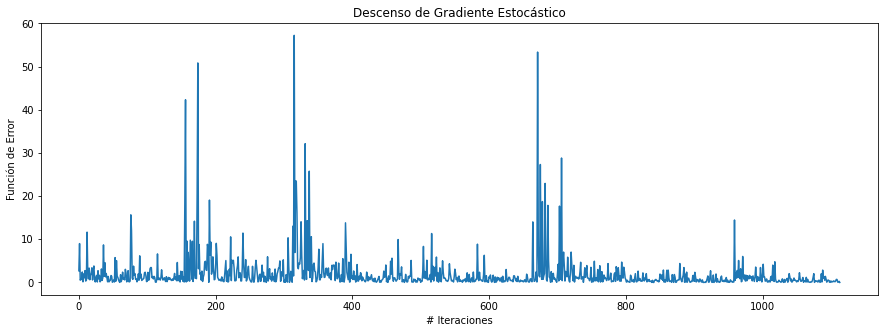

In [62]:
plt.figure(figsize=(15,5))
plt.plot(errores)
plt.xlabel('# Iteraciones')
plt.ylabel('Función de Error')
plt.title('Descenso de Gradiente Estocástico')

## Conclusiones

La siguiente tabla muestra los resultados obtenidos en los casos 1 a 4

|  | MinMaxScaler | MinMaxScaler | RobustScaler | RobustScaler |
| :- | :- | :- | :- | :- |
| | RMSE | R2 | RMSE | R2 |
| One-Hot Encoder | 0.031 | 0.917 | 0.277 | 0.9217 |
| Ordinal Encoder | 0.05 | 0.787| 0.444 | 0.787 |

|  | Entrenamiento 30% | Entrenamiento 55% | Entrenamiento 80% |
| :- | :- | :- | :- |
| RMSE | 0.049 | 0.05 | 0.05 |
| R2 | 0.785 | 0.784 | 0.787 |

De los resultados obtenidos en la parte 1 se concluye:
- El codificador categórico que mejor ajusta los datos para ambos métodos de escalamiento es el One-HotEncoder, esto ocurre porque las categorías model, transmission y fuelType poseen valores discretos que no corresponden como tal a una clasificación ordinal de primero, segundo, etc

- El escalador que mejor ajusta los datos es el MinMaxScaler, el MinMaxScaler conserva la forma original de la distribución y no reduce la influencia de valores atípicos en el modelo como lo hace el RobustScaler. Esa característica y el hecho de que es menos disruptivo en los datos originales lo hacen un mejor escalador para este caso en particular

- Para este caso en particular el tamaño de los datos de entrenamiento no afecta en gran medida los resultados del modelo, las diferencias entre los errores son menores al 2.1%. De todas formas el tamaño de los datos de entrenamiento que obtuvo el menor error fue el 30%.

De los resultados obtenidos en la parte 2 se concluye:

- El algoritmo de Descenso de Gradiente Estocástico permite hallar un modelo w que se ajusta a los datos de forma adecuada asignando un valor de error deseado como criterio de parada. El hecho de que sea estocástico reduce enormemente la computación que se debe realizar porque calcula la derivada en un solo punto del modelo.

- Debido a la naturaleza aleatoria en la inicialización de W y de la elección de cada vector en el cálculo del gradiente, se da que los índices de error en cada ejecución del modelo sean diferentes, una medida para prevenir esto es establecer un error de parada más pequeño al de 1e-3 elegido previamente pero esto implica que se necesitarán muchas más iteraciones para obtener convergencia.